In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import pandas as pd
import bisect

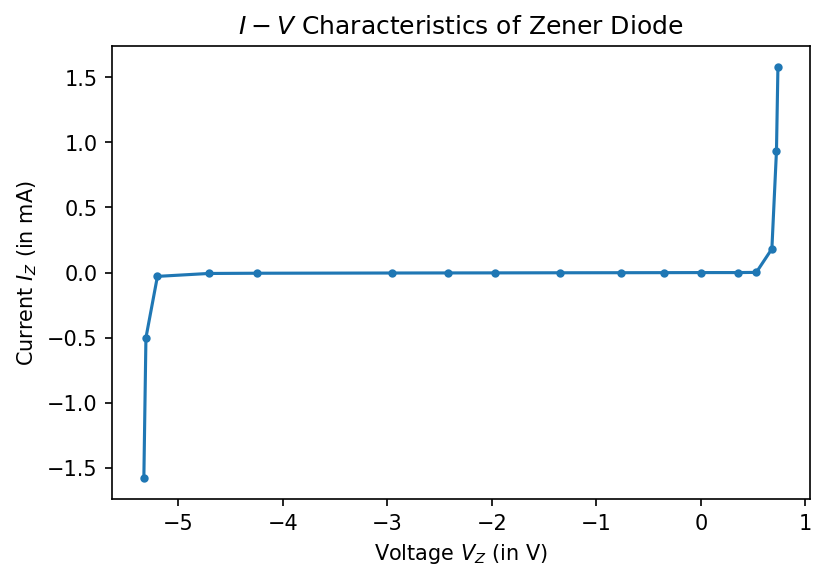

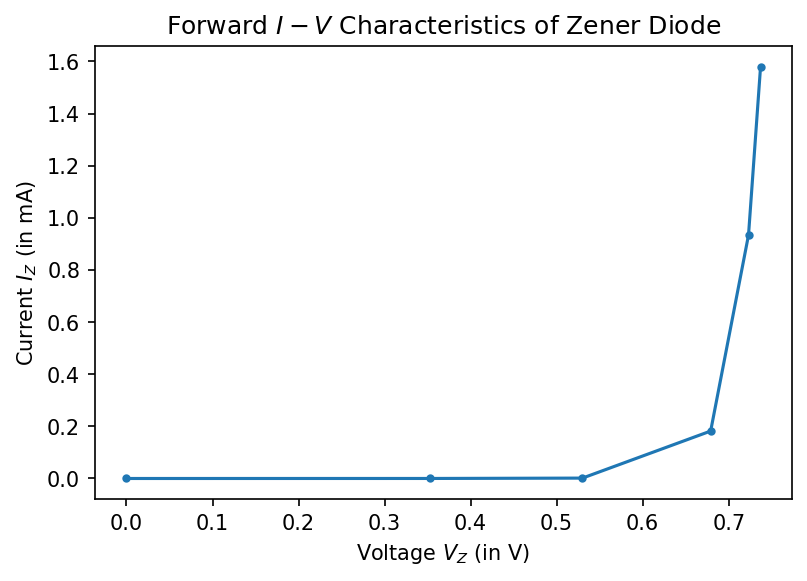

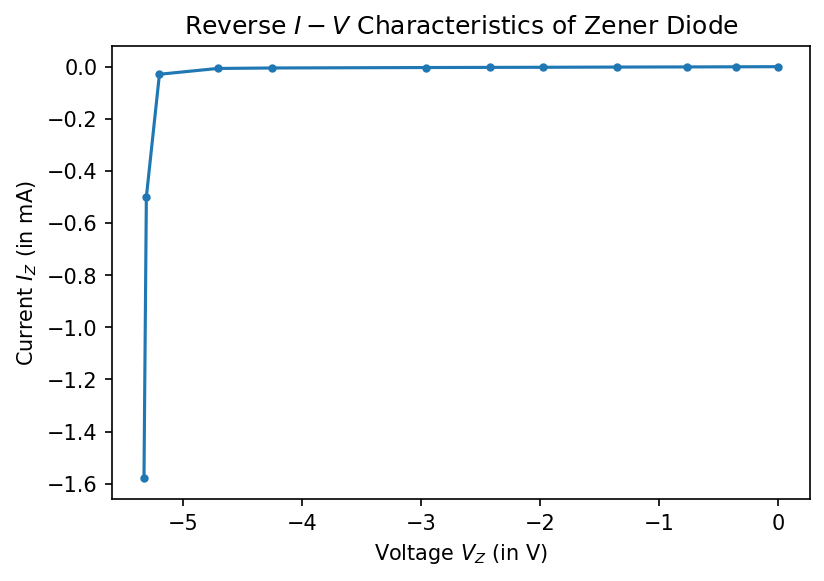

In [2]:
V_S = [-6.8, -6, -5.5, -4.9, -4.4, -3.1, -2.5, -2.1, -1.4, -0.7, -0.3, 0, 0.3, 0.6, 1, 1.5, 2]
V_Z = [-5.33, -5.31, -5.2, -4.71, -4.25, -2.96, -2.42, -1.973, -1.351, -0.767, -0.357, 0, 0.353, 0.530, 0.679, 0.723, 0.737]
I_Z = [-1.58, -0.5, -29.1e-3, -6.8e-3, -5e-3, -3.3e-3, -2.7e-3, -2.3e-3, -1.5e-3, -1e-3, -0.5e-3, 0, 0.1e-3, 1.5e-3, 182e-3, 0.934, 1.58]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{Z}$ (in V)')
ax1.set_ylabel('Current $I_Z$ (in mA)')
ax1.set_title('$I-V$ Characteristics of Zener Diode')
ax1.plot(V_Z, I_Z, '-o', markersize = 3)
fig1.set_dpi(150)
fig1.savefig('01.pdf')

fig2, ax2 = plt.subplots()
ax2.set_xlabel('Voltage $V_{Z}$ (in V)')
ax2.set_ylabel('Current $I_Z$ (in mA)')
ax2.set_title('Forward $I-V$ Characteristics of Zener Diode')
ax2.plot(V_Z[-6:], I_Z[-6:], '-o', markersize = 3)
fig2.set_dpi(150)
fig2.savefig('02.pdf')

fig3, ax3 = plt.subplots()
ax3.set_xlabel('Voltage $V_{Z}$ (in V)')
ax3.set_ylabel('Current $I_Z$ (in mA)')
ax3.set_title('Reverse $I-V$ Characteristics of Zener Diode')
ax3.plot(V_Z[:-5], I_Z[:-5], '-o', markersize = 3)
fig3.set_dpi(150)
fig3.savefig('03.pdf')

V_T = 0.4452396758207092
g_m = 0.1352169146260531


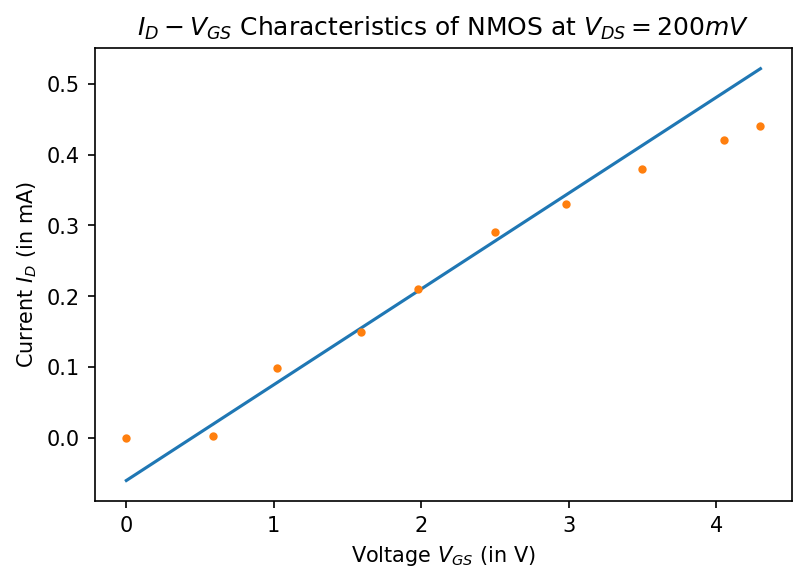

In [3]:
V_GS = np.array([0, 0.588, 1.025, 1.593, 1.98, 2.5, 2.98, 3.5, 4.05, 4.3])
I_D = np.array([0, 2e-3, 99e-3, 0.15, 0.21, 0.29, 0.33, 0.38, 0.42, 0.44])

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of NMOS at $V_{DS}=200mV$')
fig1.set_dpi(150)
slope, y_intercept, r_value, p_value, std_err = stats.linregress(V_GS[1:-3], I_D[1:-3])
ax1.plot(V_GS, slope*V_GS + y_intercept, '-o', markersize=0.01)
ax1.plot(V_GS, I_D, 'o', markersize=3)
# print(y_intercept)
V_T = -y_intercept/slope
print("V_T =", V_T)
g_m = slope
print("g_m =", g_m)  # in m mhos
fig1.savefig('111.pdf')

V_T = 0.4452396758207092
g_m = 0.1352169146260531
1.593 0.1501103670847114
111.99463374192149


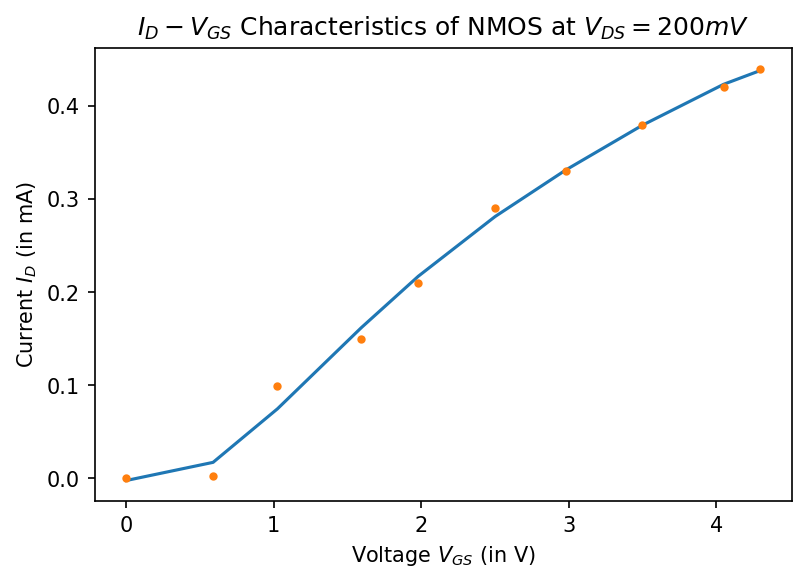

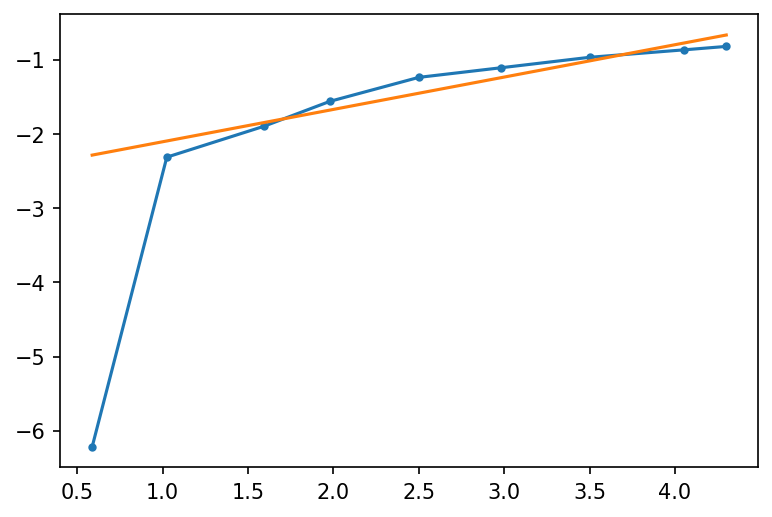

In [4]:
V_GS = np.array([0, 0.588, 1.025, 1.593, 1.98, 2.5, 2.98, 3.5, 4.05, 4.3])
I_D = np.array([0, 2e-3, 99e-3, 0.15, 0.21, 0.29, 0.33, 0.38, 0.42, 0.44])

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of NMOS at $V_{DS}=200mV$')
fig1.set_dpi(150)

p = np.poly1d(np.polyfit(V_GS, I_D, deg = 5))
ax1.plot(V_GS, [p(i) for i in V_GS], '-o', markersize=0.01)
ax1.plot(V_GS, I_D, 'o', markersize=3)
V_T = -y_intercept/slope
print("V_T =", V_T)
g_m = slope
print("g_m =", g_m)  # in m mhos
fig1.savefig('112.pdf')

d = np.poly1d.deriv(p)
max_g_m = -np.inf
max_V_GS = 0
for i in V_GS:
    s = d(i)
    if s > max_g_m:
        max_g_m = s
        max_V_GS = i
        
print(max_V_GS, max_g_m)

fig2, ax2 = plt.subplots()
ax2.plot(V_GS[1:], np.log(I_D[1:]), '-o', markersize=3)
fig2.set_dpi(150)
fig2.savefig('12.pdf')

slope, y_intercept, r_value, p_value, std_err = stats.linregress(V_GS[2:], np.log(I_D[2:]))
ax2.plot(V_GS[1:], slope*V_GS[1:] + y_intercept, '-o', markersize=0.01)

SS = 1/((np.log(I_D[2])-np.log(I_D[1]))/(1000*(V_GS[2]-V_GS[1])))
print(SS)

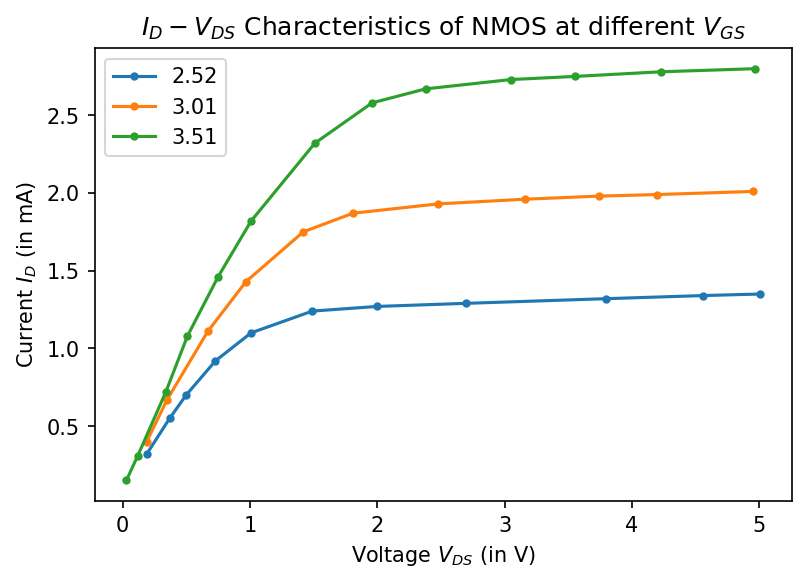

In [5]:
V_GS = [2.52, 3.01, 3.51]
V_DS = [[0.19, 0.37, 0.5, 0.73, 1.01, 1.49, 2, 2.7, 3.8, 4.56, 5.01], [0.19, 0.35, 0.67, 0.97, 1.42, 1.81, 2.48, 3.16, 3.74, 4.2, 4.95], [0.03, 0.12, 0.34, 0.51, 0.75, 1.01, 1.51, 1.96, 2.38, 3.05, 3.55, 4.23, 4.97]]
I_D = [[0.32, 0.55, 0.7, 0.92, 1.1, 1.24, 1.27, 1.29, 1.32, 1.34, 1.35], [0.4, 0.67, 1.11, 1.43, 1.75, 1.87, 1.93, 1.96, 1.98, 1.99, 2.01], [0.15, 0.31, 0.72, 1.08, 1.46, 1.82, 2.32, 2.58, 2.67, 2.73, 2.75, 2.78, 2.8]]
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{DS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{DS}$ Characteristics of NMOS at different $V_{GS}$')

for i in range(len(V_GS)):
    ax1.plot(V_DS[i], I_D[i], '-o', markersize=3)
ax1.legend(V_GS)
fig1.set_dpi(150)
fig1.savefig('21.pdf')

In [6]:
slope = []
for i in range(len(V_GS)):
    slope.append((I_D[i][-1]-I_D[i][-2])/(V_DS[i][-1]-V_DS[i][-2]))
r_0= [1/i for i in slope]
print("r_0", r_0)

r_0 [44.99999999999998, 37.500000000000384, 36.99999999999993]


In [7]:
y_intercepts = np.zeros(len(V_GS))
slope_fit = np.zeros(len(V_GS))
for i in range(len(V_GS)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(V_DS[i][-4:], I_D[i][-4:])
    y_intercepts[i] = intercept
    slope_fit[i] = slope
print(slope_fit)
print(y_intercepts)

[0.02617164 0.0274332  0.03705477]
[1.21985543 1.87492427 2.61863367]


[-46.60981597 -68.34507439 -70.66927649]
-61.87472228159754
[38.20929507 36.45217853 26.9870801 ]


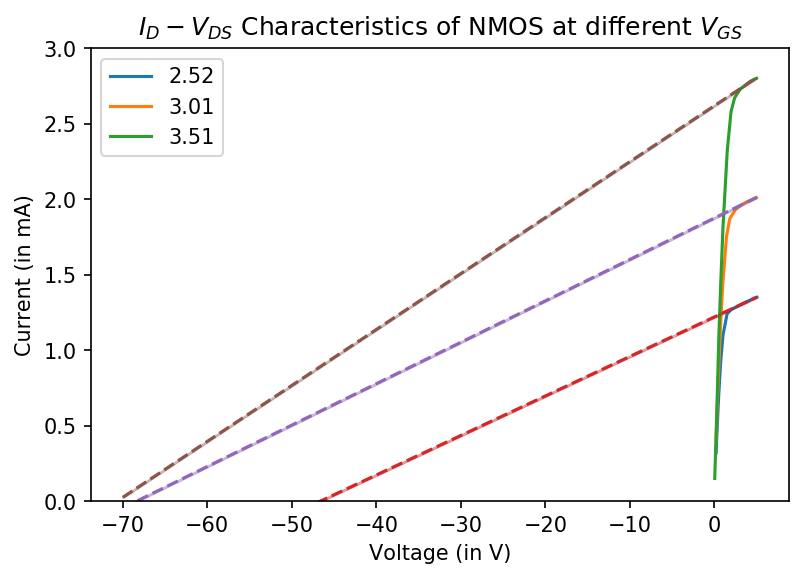

In [8]:
V_A = np.zeros(len(V_GS))
R_0 = np.zeros(len(V_GS))
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_ylim([0,3])
ax1.set_title('$I_D-V_{DS}$ Characteristics of NMOS at different $V_{GS}$')
fig1.set_dpi(150)
intersect = -70
x = np.arange(intersect,5,0.01)
for i in range(len(V_GS)):
    ax1.plot(V_DS[i], I_D[i], '-o', markersize=0.01)
for i in range(len(V_GS)):
    ax1.plot(x, (slope_fit[i]*x+y_intercepts[i]), '--o', markersize=0.01)
    V_A[i] = -y_intercepts[i]/slope_fit[i]
    R_0[i] = 1/slope_fit[i]
print(V_A)
print(np.mean(V_A))
print(R_0)
ax1.legend(V_GS)
fig1.savefig('22.pdf')

-0.6566037735848997
V_T = 0.5799999999999954
g_m = 1.132075471698112


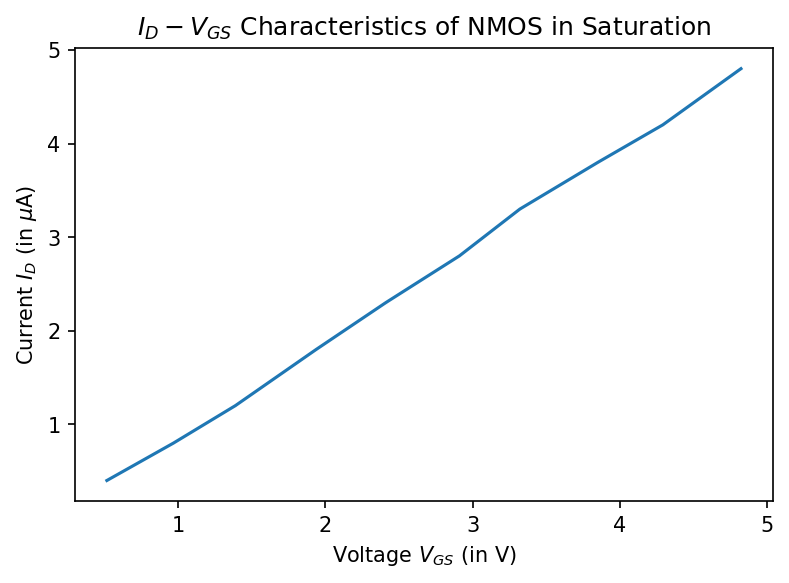

In [9]:
V_GS = np.array([0.518, 0.97, 1.39, 1.938, 2.41, 2.91, 3.32, 3.85, 4.29, 4.82])
I_D = np.array([0.4, 0.8, 1.2, 1.8, 2.3, 2.8, 3.3, 3.8, 4.2, 4.8])

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in $\mu$A)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of NMOS in Saturation')
# ax1.legend(V_GS)
fig1.set_dpi(150)
slope, y_intercept, r_value, p_value, std_err = stats.linregress(V_GS[-2:], I_D[-2:])
# ax1.plot(V_GS, slope*V_GS + y_intercept, '-o', markersize=0.01)
ax1.plot(V_GS, I_D, '-o', markersize=0.01)
print(y_intercept)
V_T = -y_intercept/slope
print("V_T =", V_T)
g_m = slope
print("g_m =", g_m)  # in m mhos
fig1.savefig('31.pdf')

In [10]:
A_v = 2.1/0.1
R_D = 1000
g_m = A_v/R_D*1000 # in m mhos
print(A_v, R_D, "\ng_m = ", g_m)

21.0 1000 
g_m =  21.0
